In [91]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch


### Data Loading

In [92]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract the features and target variables
X = mnist.data
Y = mnist.target


print('Input features shape', X.shape)
print('Target variable shape', Y.shape)


/home/krex/anaconda3/envs/jh/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Input features shape (70000, 784)
Target variable shape (70000,)


In [93]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
Y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

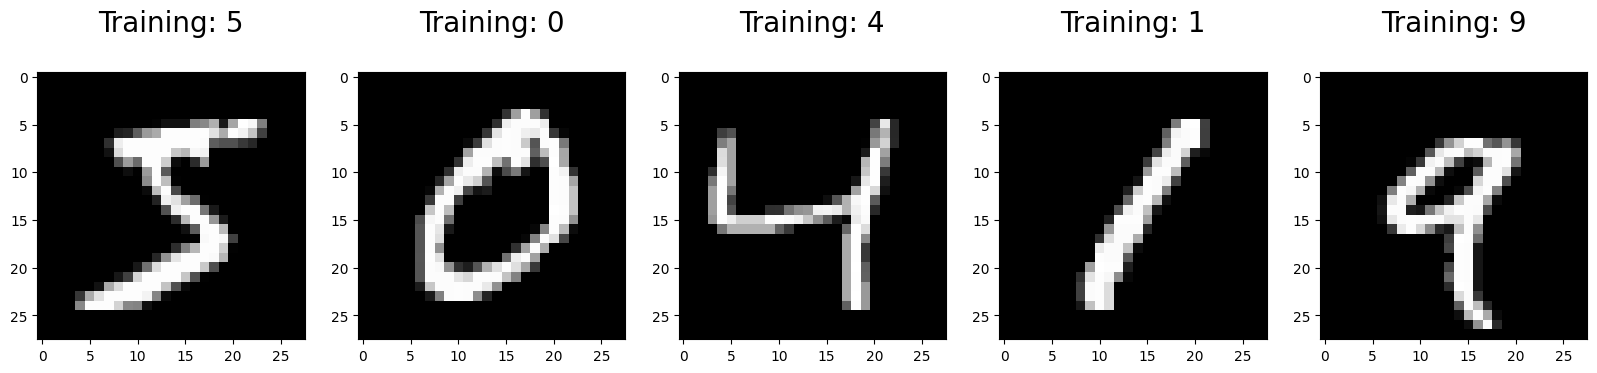

In [95]:
# visualize
X_data = X.to_numpy()
Y_data = Y.to_numpy()

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_data[0:5], Y_data[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

In [96]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

## Pytorch 간단하게 실습

In [97]:
print('GPU 사용이 가능한가? : ',torch.cuda.is_available())
print('GPU 이름 : ',torch.cuda.get_device_name(0))
print('GPU 개수 : ',torch.cuda.device_count())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') ## GPU 사용이 가능하면 GPU 사용하고 아니면 CPU 사용하라는 의미

GPU 사용이 가능한가? :  True
GPU 이름 :  NVIDIA GeForce RTX 3060
GPU 개수 :  1


In [98]:
# 데이터를 파이토치 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(np.float32(Y_train), dtype=torch.int64)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(np.float32(Y_test), dtype=torch.int64)

# 데이터를 텐서로 변환한 후 데이터 차원 확인
print(X_train_tensor.shape)
print(Y_train_tensor.shape)
print(X_test_tensor.shape)
print(Y_test_tensor.shape)

torch.Size([56000, 784])
torch.Size([56000])
torch.Size([14000, 784])
torch.Size([14000])


In [107]:
# DataLoader
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [99]:
# Pytorch Multi Layer Perceptron

import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 784) # flatten the data (n, 1, 28, 28) -> (n, 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = MLP()
model.to(device)

# Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

def train_test(model, train_loader, test_loader, optimizer, criterion, device, num_epochs):
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for data, target in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", leave=False):
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # Testing
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in tqdm(test_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Testing", leave=False):
                data, target = data.to(device), target.to(device)
                
                output = model(data)
                loss = criterion(output, target)
                
                test_loss += loss.item()
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        accuracy = 100.0 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f} - Accuracy: {accuracy:.2f}%")
    
    return train_losses, test_losses


In [102]:
# Train the model
num_epochs = 10
train_losses, test_losses = train_test(model, train_loader, test_loader, optimizer, criterion, device, num_epochs)



Epoch 1/10 - Training:   0%|          | 0/875 [00:00<?, ?it/s]

Epoch 1/10 - Train Loss: 0.6044 - Test Loss: 0.2425 - Accuracy: 93.37%


Epoch 2/10 - Train Loss: 0.1881 - Test Loss: 0.2331 - Accuracy: 93.71%


Epoch 3/10 - Train Loss: 0.1596 - Test Loss: 0.2412 - Accuracy: 94.06%


Epoch 4/10 - Train Loss: 0.1487 - Test Loss: 0.1903 - Accuracy: 94.91%


Epoch 5/10 - Train Loss: 0.1437 - Test Loss: 0.2062 - Accuracy: 95.14%


Epoch 6/10 - Train Loss: 0.1400 - Test Loss: 0.2115 - Accuracy: 95.44%


Epoch 7/10 - Train Loss: 0.1394 - Test Loss: 0.2381 - Accuracy: 94.85%


Epoch 8/10 - Train Loss: 0.1292 - Test Loss: 0.2610 - Accuracy: 94.93%


Epoch 9/10 - Train Loss: 0.1276 - Test Loss: 0.2515 - Accuracy: 95.21%


Epoch 10/10 - Train Loss: 0.1230 - Test Loss: 0.2511 - Accuracy: 95.55%


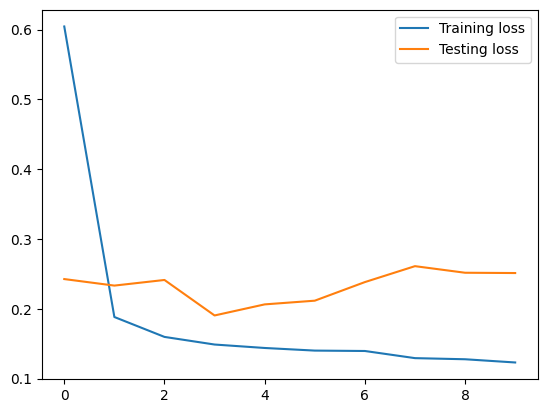

In [103]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()


Predicted: 8


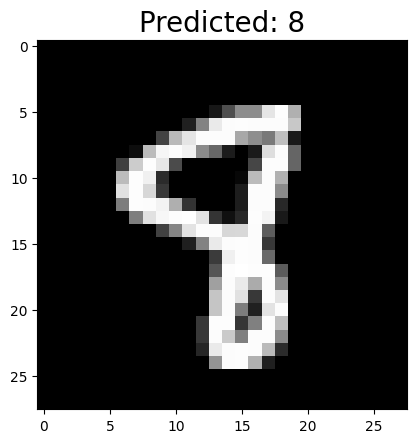

In [106]:
# Test the model

model.eval()
input_image = X_test_tensor[40].to(device) # 아무숫자나 넣어서 테스트
output = model(input_image)

predicted = output.cpu().detach().numpy().argmax()
plt.imshow(input_image.cpu().reshape(28,28), cmap=plt.cm.gray)
plt.title(f'Predicted: {predicted.item()}', fontsize = 20)

print(f'Predicted: {predicted}')